IMPORTS

In [ ]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyoff
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns

DISPLAYING DATASET

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/college/sem7/FYP/docs/dataset/cell2celltrain.csv')
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


CUSTOMER SEGMENTATION

In [ ]:
df_segmentation = df
df_segmentation

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,LAXSFN818,2.0,2.0,526.0,68.0,64.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,LAXCDG310,2.0,2.0,464.0,48.0,48.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,No,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,LAXCDG310,3.0,2.0,378.0,36.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,NEVPOW619,2.0,2.0,433.0,32.0,0.0,Yes,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,9,No,0,30,No,5-Low,Other,Other,No


In [ ]:
customer_per_MonthsInService = df_segmentation
customer_per_MonthsInService

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,LAXSFN818,2.0,2.0,526.0,68.0,64.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,LAXCDG310,2.0,2.0,464.0,48.0,48.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,No,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,LAXCDG310,3.0,2.0,378.0,36.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,NEVPOW619,2.0,2.0,433.0,32.0,0.0,Yes,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,9,No,0,30,No,5-Low,Other,Other,No


In [ ]:
plot_data = [
    go.Histogram(
        x=customer_per_MonthsInService['MonthsInService']
    )
]

plot_layout = go.Layout(
        title='MonthsInService'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



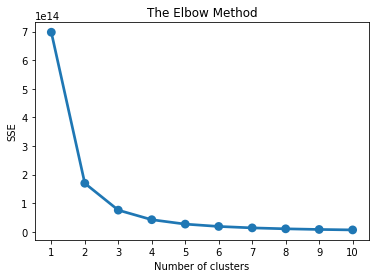

In [ ]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(customer_per_MonthsInService[['CustomerID', 'MonthsInService']])
    customer_per_MonthsInService["MonthsInServiceCluster"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
sns.pointplot(list(sse.keys()), list(sse.values()))
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(customer_per_MonthsInService[['MonthsInService']])
customer_per_MonthsInService['MonthsInServiceCluster'] = kmeans.predict(customer_per_MonthsInService[['MonthsInService']])

In [ ]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [ ]:
df_segmentation_MonthsInService = order_cluster('MonthsInServiceCluster', 'MonthsInService', customer_per_MonthsInService,True)
df_segmentation_MonthsInService.groupby('MonthsInServiceCluster')['MonthsInService'].describe()

,count,mean,std,min,25%,50%,75%,max
MonthsInServiceCluster,,,,,,,,
0,25634.0,11.094835,2.823764,6.0,9.0,11.0,13.0,16.0
1,17971.0,22.171999,3.533128,17.0,19.0,22.0,25.0,29.0
2,7442.0,36.897743,6.457694,30.0,32.0,35.0,40.0,61.0


In [ ]:
df_segmentation_MonthsInService

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,MonthsInServiceCluster
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No,2
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes,2
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes,2
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No,2
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3390490,No,217.08,2299.0,46.0,0.25,442.0,0.4,1591.0,382.5,9.0,1.3,160.7,4.0,0.0,306.9,134.3,14.7,152.0,249.3,10.3,0.0,4.0,6,1,1,AIRBEA843,1.0,1.0,181.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,Unknown,No,4-Medium,Town,Other,Unknown,0
51043,3390518,No,55.23,377.0,45.0,1.24,38.0,0.0,-118.0,-15.2,5.0,5.7,20.3,1.3,0.0,36.8,14.0,1.7,47.0,40.0,10.7,0.0,0.7,11,2,1,HOUSPR832,1.0,1.0,178.0,50.0,50.0,No,No,Yes,Yes,Yes,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,8,No,0,Unknown,No,4-Medium,Rural,Professional,Yes,0
51044,3390522,No,41.94,376.0,41.0,0.25,0.0,0.2,39.0,-11.9,2.0,0.0,16.7,4.3,0.0,9.8,4.0,3.3,21.0,28.7,2.0,0.0,0.0,8,3,2,APCBET240,1.0,1.0,173.0,44.0,40.0,Yes,No,Yes,Yes,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,Unknown,No,3-Good,Suburban,Other,Unknown,0
51045,3390526,No,34.99,789.0,45.0,0.00,0.0,0.0,13.0,0.0,0.3,0.3,11.3,0.0,0.0,107.0,10.0,12.3,24.0,40.7,0.7,0.0,0.7,12,2,1,NMXSAN915,1.0,1.0,173.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,Unknown,No,2-High,Town,Other,Unknown,0


In [ ]:
df_churn_prone_customers = df_segmentation_MonthsInService[df_segmentation_MonthsInService['MonthsInServiceCluster'] == 0]

In [ ]:
# 1st cluster: prone to churning
df_churn_prone_customers

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,MonthsInServiceCluster
25413,3043654,No,97.11,441.0,60.0,0.00,144.0,0.0,-265.0,-43.1,19.0,2.0,66.3,3.3,0.0,109.6,107.0,32.0,188.7,78.3,21.0,0.0,3.7,12,2,1,APCFCH703,2.0,2.0,20.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,Yes,0,0,No,No,0,2,No,0,130,No,7-Lowest,Suburban,Other,No,0
25414,3075822,No,32.89,96.0,50.0,0.25,0.0,0.0,46.0,14.2,1.7,1.3,5.7,0.7,0.0,26.0,5.7,2.3,35.7,16.3,3.0,0.0,0.0,8,2,1,ATLATL678,1.0,1.0,255.0,52.0,24.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,5,No,0,Unknown,No,3-Good,Suburban,Other,Yes,0
25415,3077822,No,30.34,344.0,40.0,0.00,0.0,0.3,-101.0,-0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,2,2,BOSPRO401,2.0,2.0,61.0,44.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,5,No,0,200,No,3-Good,Other,Other,Unknown,0
25416,3089738,No,29.85,685.0,10.0,0.00,36.0,10.9,-133.0,-19.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,2,2,CHIJOL815,1.0,1.0,294.0,28.0,30.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,Unknown,No,1-Highest,Other,Professional,Yes,0
25417,3102498,Yes,81.73,867.0,87.0,1.49,68.0,0.0,137.0,5.2,3.3,48.0,25.7,0.7,2.3,169.9,31.3,0.7,298.7,43.3,51.3,0.0,2.0,15,1,1,CHICHI773,2.0,1.0,303.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,Yes,0,0,No,0,30,No,5-Low,Other,Other,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3390490,No,217.08,2299.0,46.0,0.25,442.0,0.4,1591.0,382.5,9.0,1.3,160.7,4.0,0.0,306.9,134.3,14.7,152.0,249.3,10.3,0.0,4.0,6,1,1,AIRBEA843,1.0,1.0,181.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,Unknown,No,4-Medium,Town,Other,Unknown,0
51043,3390518,No,55.23,377.0,45.0,1.24,38.0,0.0,-118.0,-15.2,5.0,5.7,20.3,1.3,0.0,36.8,14.0,1.7,47.0,40.0,10.7,0.0,0.7,11,2,1,HOUSPR832,1.0,1.0,178.0,50.0,50.0,No,No,Yes,Yes,Yes,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,8,No,0,Unknown,No,4-Medium,Rural,Professional,Yes,0
51044,3390522,No,41.94,376.0,41.0,0.25,0.0,0.2,39.0,-11.9,2.0,0.0,16.7,4.3,0.0,9.8,4.0,3.3,21.0,28.7,2.0,0.0,0.0,8,3,2,APCBET240,1.0,1.0,173.0,44.0,40.0,Yes,No,Yes,Yes,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,Unknown,No,3-Good,Suburban,Other,Unknown,0
51045,3390526,No,34.99,789.0,45.0,0.00,0.0,0.0,13.0,0.0,0.3,0.3,11.3,0.0,0.0,107.0,10.0,12.3,24.0,40.7,0.7,0.0,0.7,12,2,1,NMXSAN915,1.0,1.0,173.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,Unknown,No,2-High,Town,Other,Unknown,0


In [ ]:
dataset = df_churn_prone_customers

In [ ]:
# dataset shape
dataset.shape

(25634, 59)

In [ ]:
# missing values
dataset.isnull().values.any()

True

In [ ]:
# churn 
dataset['Churn'].value_counts()

No     18326
Yes     7308
Name: Churn, dtype: int64

In [ ]:
# missing values in churn column
dataset['Churn'].isna().sum()

0

In [ ]:
# removing features that don't seem to have a lot of effect on the model
dataset = dataset.drop(['HandsetPrice', 'HandsetModels', 'Homeownership', 'MaritalStatus', 'UniqueSubs', 'PeakCallsInOut','OffPeakCallsInOut','DroppedBlockedCalls',
             'RetentionCalls','InboundCalls','OverageMinutes','ReceivedCalls', 'OwnsMotorcycle', 'NonUSTravel', 'OwnsComputer', 'RVOwner', 'TruckOwner', 'HandsetRefurbished', 
             'HandsetWebCapable', 'Handsets'], axis=1)

In [ ]:
dataset

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,OutboundCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,ActiveSubs,ServiceArea,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,HasCreditCard,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MonthsInServiceCluster
25413,3043654,No,97.11,441.0,60.0,0.00,0.0,-265.0,-43.1,19.0,2.0,66.3,3.3,0.0,107.0,0.0,3.7,12,1,APCFCH703,20.0,0.0,0.0,No,No,No,No,Yes,0,No,No,0,2,0,No,7-Lowest,Suburban,Other,0
25414,3075822,No,32.89,96.0,50.0,0.25,0.0,46.0,14.2,1.7,1.3,5.7,0.7,0.0,5.7,0.0,0.0,8,1,ATLATL678,255.0,52.0,24.0,No,Yes,Yes,No,Yes,0,No,No,0,5,0,No,3-Good,Suburban,Other,0
25415,3077822,No,30.34,344.0,40.0,0.00,0.3,-101.0,-0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,2,BOSPRO401,61.0,44.0,0.0,No,No,No,No,Yes,0,No,No,0,5,0,No,3-Good,Other,Other,0
25416,3089738,No,29.85,685.0,10.0,0.00,10.9,-133.0,-19.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,2,CHIJOL815,294.0,28.0,30.0,Yes,Yes,Yes,No,Yes,0,No,No,0,6,0,No,1-Highest,Other,Professional,0
25417,3102498,Yes,81.73,867.0,87.0,1.49,0.0,137.0,5.2,3.3,48.0,25.7,0.7,2.3,31.3,0.0,2.0,15,1,CHICHI773,303.0,0.0,0.0,No,No,No,No,No,0,No,Yes,0,0,0,No,5-Low,Other,Other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3390490,No,217.08,2299.0,46.0,0.25,0.4,1591.0,382.5,9.0,1.3,160.7,4.0,0.0,134.3,0.0,4.0,6,1,AIRBEA843,181.0,0.0,0.0,No,No,No,No,No,0,No,No,0,0,0,No,4-Medium,Town,Other,0
51043,3390518,No,55.23,377.0,45.0,1.24,0.0,-118.0,-15.2,5.0,5.7,20.3,1.3,0.0,14.0,0.0,0.7,11,1,HOUSPR832,178.0,50.0,50.0,No,Yes,Yes,No,Yes,0,No,No,0,8,0,No,4-Medium,Rural,Professional,0
51044,3390522,No,41.94,376.0,41.0,0.25,0.2,39.0,-11.9,2.0,0.0,16.7,4.3,0.0,4.0,0.0,0.0,8,2,APCBET240,173.0,44.0,40.0,Yes,Yes,Yes,No,Yes,0,No,No,0,6,0,No,3-Good,Suburban,Other,0
51045,3390526,No,34.99,789.0,45.0,0.00,0.0,13.0,0.0,0.3,0.3,11.3,0.0,0.0,10.0,0.0,0.7,12,1,NMXSAN915,173.0,0.0,0.0,No,No,No,No,No,0,No,No,0,0,0,No,2-High,Town,Other,0


PRE-PROCESSING DATASET

In [ ]:
# Pre-processing (Normalizing values)

In [ ]:
binary_cols=[]
multi_Value=[]
for col in dataset.columns :
    if dataset[col].dtype =='object':
        if dataset[col].unique().shape[0]==2:
            binary_cols.append(col)
        else:
            multi_Value.append(col)

In [ ]:
binary_cols

['Churn',
 'ChildrenInHH',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'MadeCallToRetentionTeam']

In [ ]:
multi_Value

['ServiceArea', 'CreditRating', 'PrizmCode', 'Occupation']

In [ ]:
# using label encoder for normalizing multi value columns
from sklearn.preprocessing import LabelEncoder
LE_cat = LabelEncoder() 
for i in multi_Value:
    dataset[i] = LE_cat.fit_transform(dataset[i].astype(str))

In [ ]:
dataset

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,OutboundCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,ActiveSubs,ServiceArea,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,HasCreditCard,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MonthsInServiceCluster
25413,3043654,No,97.11,441.0,60.0,0.00,0.0,-265.0,-43.1,19.0,2.0,66.3,3.3,0.0,107.0,0.0,3.7,12,1,39,20.0,0.0,0.0,No,No,No,No,Yes,0,No,No,0,2,0,No,6,2,3,0
25414,3075822,No,32.89,96.0,50.0,0.25,0.0,46.0,14.2,1.7,1.3,5.7,0.7,0.0,5.7,0.0,0.0,8,1,58,255.0,52.0,24.0,No,Yes,Yes,No,Yes,0,No,No,0,5,0,No,2,2,3,0
25415,3077822,No,30.34,344.0,40.0,0.00,0.3,-101.0,-0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,2,101,61.0,44.0,0.0,No,No,No,No,Yes,0,No,No,0,5,0,No,2,0,3,0
25416,3089738,No,29.85,685.0,10.0,0.00,10.9,-133.0,-19.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,2,113,294.0,28.0,30.0,Yes,Yes,Yes,No,Yes,0,No,No,0,6,0,No,0,0,4,0
25417,3102498,Yes,81.73,867.0,87.0,1.49,0.0,137.0,5.2,3.3,48.0,25.7,0.7,2.3,31.3,0.0,2.0,15,1,107,303.0,0.0,0.0,No,No,No,No,No,0,No,Yes,0,0,0,No,4,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3390490,No,217.08,2299.0,46.0,0.25,0.4,1591.0,382.5,9.0,1.3,160.7,4.0,0.0,134.3,0.0,4.0,6,1,4,181.0,0.0,0.0,No,No,No,No,No,0,No,No,0,0,0,No,3,3,3,0
51043,3390518,No,55.23,377.0,45.0,1.24,0.0,-118.0,-15.2,5.0,5.7,20.3,1.3,0.0,14.0,0.0,0.7,11,1,230,178.0,50.0,50.0,No,Yes,Yes,No,Yes,0,No,No,0,8,0,No,3,1,4,0
51044,3390522,No,41.94,376.0,41.0,0.25,0.2,39.0,-11.9,2.0,0.0,16.7,4.3,0.0,4.0,0.0,0.0,8,2,37,173.0,44.0,40.0,Yes,Yes,Yes,No,Yes,0,No,No,0,6,0,No,2,2,3,0
51045,3390526,No,34.99,789.0,45.0,0.00,0.0,13.0,0.0,0.3,0.3,11.3,0.0,0.0,10.0,0.0,0.7,12,1,426,173.0,0.0,0.0,No,No,No,No,No,0,No,No,0,0,0,No,1,3,3,0


In [ ]:
dataset.shape

(25634, 39)

In [ ]:
# using get dummies for normalizing binary value columns
Binary_cols_except_churn=binary_cols[1:]
dataset_yes_no=dataset[Binary_cols_except_churn]
dataset_yes_no

,ChildrenInHH,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,MadeCallToRetentionTeam
25413,No,No,No,No,Yes,No,No,No
25414,No,Yes,Yes,No,Yes,No,No,No
25415,No,No,No,No,Yes,No,No,No
25416,Yes,Yes,Yes,No,Yes,No,No,No
25417,No,No,No,No,No,No,Yes,No
...,...,...,...,...,...,...,...,...
51042,No,No,No,No,No,No,No,No
51043,No,Yes,Yes,No,Yes,No,No,No
51044,Yes,Yes,Yes,No,Yes,No,No,No
51045,No,No,No,No,No,No,No,No


In [ ]:
dfDummies = pd.get_dummies(dataset_yes_no, prefix = dataset_yes_no.columns)
dfDummies.shape

(25634, 16)

In [ ]:
dataset.shape

(25634, 39)

In [ ]:
removed_binary_cols=dataset.drop(binary_cols,axis=1)
removed_binary_cols

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,OutboundCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,ActiveSubs,ServiceArea,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation,MonthsInServiceCluster
25413,3043654,97.11,441.0,60.0,0.00,0.0,-265.0,-43.1,19.0,2.0,66.3,3.3,0.0,107.0,0.0,3.7,12,1,39,20.0,0.0,0.0,0,0,2,0,6,2,3,0
25414,3075822,32.89,96.0,50.0,0.25,0.0,46.0,14.2,1.7,1.3,5.7,0.7,0.0,5.7,0.0,0.0,8,1,58,255.0,52.0,24.0,0,0,5,0,2,2,3,0
25415,3077822,30.34,344.0,40.0,0.00,0.3,-101.0,-0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,2,101,61.0,44.0,0.0,0,0,5,0,2,0,3,0
25416,3089738,29.85,685.0,10.0,0.00,10.9,-133.0,-19.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,2,113,294.0,28.0,30.0,0,0,6,0,0,0,4,0
25417,3102498,81.73,867.0,87.0,1.49,0.0,137.0,5.2,3.3,48.0,25.7,0.7,2.3,31.3,0.0,2.0,15,1,107,303.0,0.0,0.0,0,0,0,0,4,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3390490,217.08,2299.0,46.0,0.25,0.4,1591.0,382.5,9.0,1.3,160.7,4.0,0.0,134.3,0.0,4.0,6,1,4,181.0,0.0,0.0,0,0,0,0,3,3,3,0
51043,3390518,55.23,377.0,45.0,1.24,0.0,-118.0,-15.2,5.0,5.7,20.3,1.3,0.0,14.0,0.0,0.7,11,1,230,178.0,50.0,50.0,0,0,8,0,3,1,4,0
51044,3390522,41.94,376.0,41.0,0.25,0.2,39.0,-11.9,2.0,0.0,16.7,4.3,0.0,4.0,0.0,0.0,8,2,37,173.0,44.0,40.0,0,0,6,0,2,2,3,0
51045,3390526,34.99,789.0,45.0,0.00,0.0,13.0,0.0,0.3,0.3,11.3,0.0,0.0,10.0,0.0,0.7,12,1,426,173.0,0.0,0.0,0,0,0,0,1,3,3,0


In [ ]:
clean_dataframe=pd.concat([removed_binary_cols, dfDummies, dataset['Churn']], axis=1)
clean_dataframe['Churn'].replace('Yes', 1, inplace=True)
clean_dataframe['Churn'].replace('No', 0, inplace=True)

In [ ]:
clean_dataframe

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,OutboundCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,ActiveSubs,ServiceArea,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation,MonthsInServiceCluster,ChildrenInHH_No,ChildrenInHH_Yes,BuysViaMailOrder_No,BuysViaMailOrder_Yes,RespondsToMailOffers_No,RespondsToMailOffers_Yes,OptOutMailings_No,OptOutMailings_Yes,HasCreditCard_No,HasCreditCard_Yes,NewCellphoneUser_No,NewCellphoneUser_Yes,NotNewCellphoneUser_No,NotNewCellphoneUser_Yes,MadeCallToRetentionTeam_No,MadeCallToRetentionTeam_Yes,Churn
25413,3043654,97.11,441.0,60.0,0.00,0.0,-265.0,-43.1,19.0,2.0,66.3,3.3,0.0,107.0,0.0,3.7,12,1,39,20.0,0.0,0.0,0,0,2,0,6,2,3,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0
25414,3075822,32.89,96.0,50.0,0.25,0.0,46.0,14.2,1.7,1.3,5.7,0.7,0.0,5.7,0.0,0.0,8,1,58,255.0,52.0,24.0,0,0,5,0,2,2,3,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0
25415,3077822,30.34,344.0,40.0,0.00,0.3,-101.0,-0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,2,101,61.0,44.0,0.0,0,0,5,0,2,0,3,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0
25416,3089738,29.85,685.0,10.0,0.00,10.9,-133.0,-19.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,2,113,294.0,28.0,30.0,0,0,6,0,0,0,4,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0
25417,3102498,81.73,867.0,87.0,1.49,0.0,137.0,5.2,3.3,48.0,25.7,0.7,2.3,31.3,0.0,2.0,15,1,107,303.0,0.0,0.0,0,0,0,0,4,0,3,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3390490,217.08,2299.0,46.0,0.25,0.4,1591.0,382.5,9.0,1.3,160.7,4.0,0.0,134.3,0.0,4.0,6,1,4,181.0,0.0,0.0,0,0,0,0,3,3,3,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0
51043,3390518,55.23,377.0,45.0,1.24,0.0,-118.0,-15.2,5.0,5.7,20.3,1.3,0.0,14.0,0.0,0.7,11,1,230,178.0,50.0,50.0,0,0,8,0,3,1,4,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0
51044,3390522,41.94,376.0,41.0,0.25,0.2,39.0,-11.9,2.0,0.0,16.7,4.3,0.0,4.0,0.0,0.0,8,2,37,173.0,44.0,40.0,0,0,6,0,2,2,3,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0
51045,3390526,34.99,789.0,45.0,0.00,0.0,13.0,0.0,0.3,0.3,11.3,0.0,0.0,10.0,0.0,0.7,12,1,426,173.0,0.0,0.0,0,0,0,0,1,3,3,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0


In [ ]:
# Imputation preserves all cases by replacing missing data with an estimated value based on other available information.

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
final_dataset = pd.DataFrame(imputer.fit_transform(clean_dataframe),columns = clean_dataframe.columns)

In [ ]:
bar_df=final_dataset.isna().sum()
bar_df[bar_df>0]

Series([], dtype: int64)

CUSTOMER CHURN

In [ ]:
# XG Boost

In [ ]:
from sklearn.model_selection import train_test_split
y = final_dataset["Churn"]
X = final_dataset.drop(["Churn", 'CustomerID'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

In [ ]:
from xgboost.sklearn import XGBClassifier
xgb_model = XGBClassifier().fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [ ]:
xgb_model

XGBClassifier()

In [ ]:
model = xgb_model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.98      0.84      3669
         1.0       0.63      0.10      0.17      1458

    accuracy                           0.73      5127
   macro avg       0.68      0.54      0.50      5127
weighted avg       0.70      0.73      0.65      5127



In [ ]:
# Decision tree

In [ ]:
y = final_dataset["Churn"]
X = final_dataset.drop(["Churn", 'CustomerID'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy', random_state=1)
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
prediction = DT.predict(X_test)

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.74      0.73      0.74      3669
         1.0       0.35      0.37      0.36      1458

    accuracy                           0.63      5127
   macro avg       0.55      0.55      0.55      5127
weighted avg       0.63      0.63      0.63      5127



In [ ]:
# Stochastic gradient descent

In [ ]:
y = final_dataset["Churn"]
X = final_dataset.drop(["Churn", 'CustomerID'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import SGDClassifier
SGDC = SGDClassifier()
SGDC.fit(X_train, y_train)

SGDClassifier()

In [ ]:
predictions = SGDC.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.72      0.97      0.83      3669
         1.0       0.40      0.05      0.10      1458

    accuracy                           0.71      5127
   macro avg       0.56      0.51      0.46      5127
weighted avg       0.63      0.71      0.62      5127



In [ ]:
# Logistic regression

In [ ]:
y = final_dataset["Churn"]
X = final_dataset.drop(["Churn", 'CustomerID'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
classifier = LogisticRegression(max_iter=4000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

In [ ]:
predictions = classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.72      0.98      0.83      3669
         1.0       0.50      0.04      0.07      1458

    accuracy                           0.72      5127
   macro avg       0.61      0.51      0.45      5127
weighted avg       0.66      0.72      0.62      5127

